In [ ]:
## "In this code, I am going to analyze my son's sleeping progress and try to find factors that affect his sleeping

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [55]:
df=pd.read_excel('/home/eli/ReDI/excersice/data/nick data set.xlsx')
df.head()

,night sleeping,times waking up,naps,day,age,food,milk,waking up during night,tv,park
0,21:30:00,07:00:00,1,2024-06-01,18,rise and chicken,250,2,no,yes
1,21:00:00,07:30:00,2,2024-06-02,18,pizza,70,1,no,yes
2,21:45:00,08:00:00,2,2024-06-03,18,rise and ghorme sabzi,0,1,no,yes
3,20:30:00,07:30:00,1,2024-06-04,18,chicken,240,2,no,yes
4,21:30:00,08:30:00,2,2024-06-05,19,lamp,200,2,yes,no


In [18]:
print(df.columns)

Index(['night sleeping', 'times  waking up', 'naps', 'day', 'age', 'food',
       'milk', 'waking up during night', 'tv', 'park'],
      dtype='object')


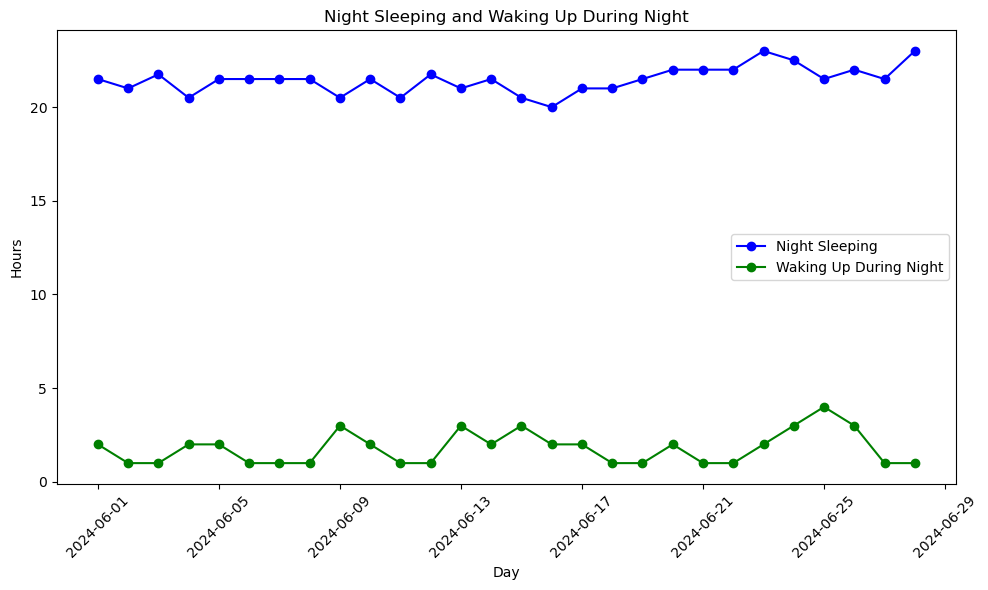

In [56]:


# Step 2: Convert 'day' column to datetime format
df['day'] = pd.to_datetime(df['day'], format='%d/%m/%Y')

# Step 3: Convert 'night sleeping' from time format to numeric hours
def time_to_hours(time_str):
    try:
        if pd.isna(time_str):
            return pd.NaT
        
        # Check for various time formats and adjust parsing accordingly
        parts = time_str.split(':')
        if len(parts) == 3:
            hours = int(parts[0]) + int(parts[1]) / 60 + int(parts[2]) / 3600
        elif len(parts) == 2:
            hours = int(parts[0]) + int(parts[1]) / 60
        else:
            return pd.NaT
        
        return hours
    except (AttributeError, IndexError, ValueError):
        return pd.NaT

# Apply the conversion function to 'night sleeping' column
df['night sleeping'] = df['night sleeping'].apply(lambda x: time_to_hours(str(x)))

# Step 4: Plotting
plt.figure(figsize=(10, 6))

# Plot night sleeping
plt.plot(df['day'], df['night sleeping'], marker='o', linestyle='-', color='b', label='Night Sleeping')

# Plot waking up during night
plt.plot(df['day'], df['waking up during night'], marker='o', linestyle='-', color='g', label='Waking Up During Night')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Hours')
plt.title('Night Sleeping and Waking Up During Night')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [58]:
new_df = df.copy()

# Step 5: Save the new DataFrame to a CSV file
new_df.to_csv('new_version_nick_dataframe.csv', index=False)

In [5]:
#USE NEW VERSION OF DATA FRAME WHICH THE FORMAT OF TIME IS CHANGED
df=pd.read_csv('/home/eli/ReDI/excersice/Nick evaluation/new_version_nick_dataframe.csv')
df.head()

,night sleeping,times waking up,naps,day,age,food,milk,waking up during night,tv,park
0,21.50,07:00:00,1,2024-06-01,18,rise and chicken,250,2,no,yes
1,21.00,07:30:00,2,2024-06-02,18,pizza,70,1,no,yes
2,21.75,08:00:00,2,2024-06-03,18,rise and ghorme sabzi,0,1,no,yes
3,20.50,07:30:00,1,2024-06-04,18,chicken,240,2,no,yes
4,21.50,08:30:00,2,2024-06-05,19,lamp,200,2,yes,no


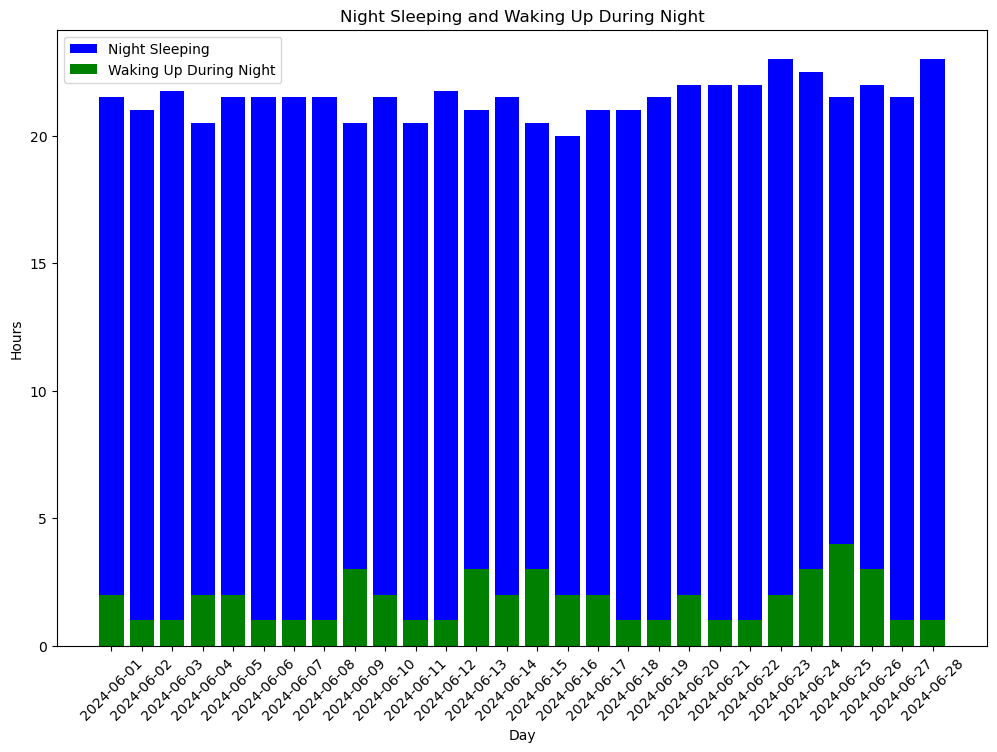

In [8]:
plt.figure(figsize=(12, 8))

# Create bar chart for night sleeping
plt.bar(df['day'] , df['night sleeping'], width=0.8, color='b', align='center', label='Night Sleeping')

# Create bar chart for waking up during night
plt.bar(df['day'], df['waking up during night'], width=0.8, color='g', align='center', label='Waking Up During Night')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Hours')
plt.title('Night Sleeping and Waking Up During Night')
plt.xticks(rotation=45)
plt.legend()

In [10]:
import pandas as pd

# Assuming df['night sleeping'] and df['waking up during night'] are already numeric columns

# Calculate Pearson correlation coefficient
correlation = df['night sleeping'].corr(df['waking up during night'])

print(f"Pearson correlation coefficient: {correlation:.2f}")


Pearson correlation coefficient: -0.13


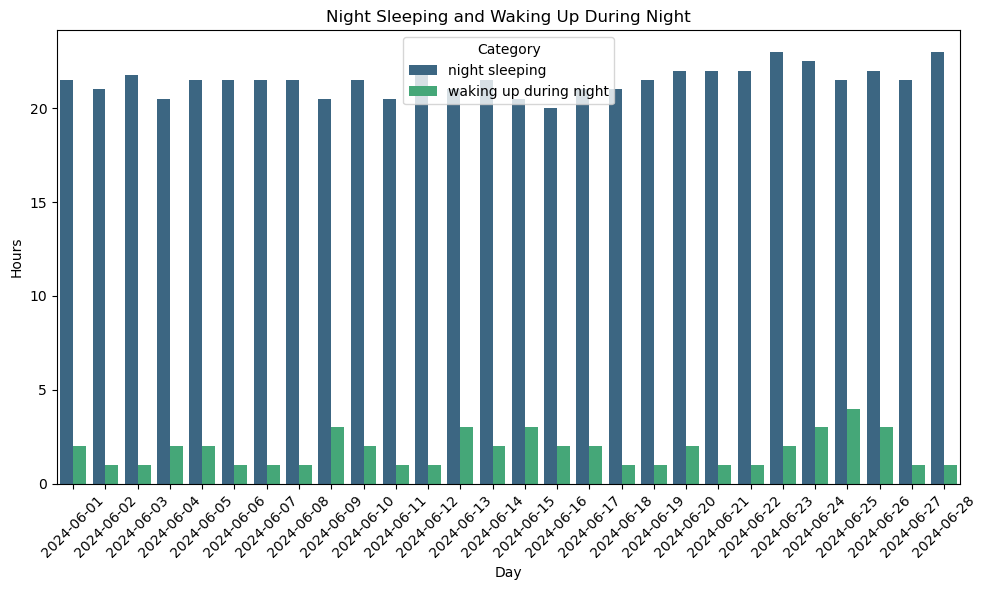

In [11]:
df_melted = pd.melt(df, id_vars=['day'], value_vars=['night sleeping', 'waking up during night'],
                    var_name='Category', value_name='Hours')

# Step 4: Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='Hours', hue='Category', data=df_melted, palette='viridis')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Hours')
plt.title('Night Sleeping and Waking Up During Night')
plt.xticks(rotation=45)
plt.legend(title='Category')

# Show plot
plt.tight_layout()
plt.show()